In [42]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from scipy import stats
from dateutil import parser
from matplotlib.dates import DateFormatter

conn = sqlite3.connect("MollerRunsDB.sql")
c = conn.cursor()
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 18})
def plot_from_DB(query, title = '', xtitle = '', ytitle = '', regress = False):
    c.execute(query)
    #print(c.fetchall())
    data = c.fetchall()
    x = [row[0] for row in data]
    y = [row[1] for row in data]
    
    plt.plot(x, y,'.')
    slope, std_err = 0, 0
    if regress == True:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        #print("Slope: ",slope, " +/- ", std_err)
        line = slope*np.asarray(x)+intercept
        plt.plot(x,y,'o', x, line)   
        lowx = plt.gca().get_xlim()[0]
        lowx = lowx + 0.2*(plt.gca().get_xlim()[1]-lowx)
        lowy = plt.gca().get_ylim()[0]
        lowy = lowy + 0.05*(plt.gca().get_ylim()[1]-lowy)
        plt.text(lowx, lowy, "Slope: %0.6f +/- %0.6f" % (slope,std_err),fontsize=14, ha='center') 
        plt.title(title)
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)
        plt.show()
    else:
        plt.plot(x,y,'o')   
        plt.title(title)
        plt.xlabel(xtitle)
        plt.ylabel(ytitle)
        plt.show()
    return 

def plot_from_DB2(query, title = '', xtitle = '', ytitle = '',yt1 = '', yt2 = '', logy = False):
    c.execute(query)
    #print(c.fetchall())
    data = c.fetchall()
    x = [row[0] for row in data]
    y1 = [row[1] for row in data]
    y2 = [row[2] for row in data]
    
    plt.plot(x, y1,'.',label=yt1)
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.plot(x, y2,'.',label=yt2)
    plt.legend()
    if logy == True:
        plt.yscale('log')
    plt.show()
    return 

def plot_time_series(query, title = '', ytitle = ''):
    c.execute(query)
    #print(c.fetchall())
    data = c.fetchall()
    t = [parser.parse(row[0]) for row in data]
    y = [row[1] for row in data]

    fig, ax = plt.subplots()
    ax.plot(t,y,'o')
    plt.title(title)
    plt.xlabel("Date in 2019")
    plt.ylabel(ytitle)

    myFmt = DateFormatter("%b %d")
    ax.xaxis.set_major_formatter(myFmt)

    ## Rotate date labels automatically
    fig.autofmt_xdate()
    plt.show()
    return


def plot_time_series2(query, title = '', ytitle = '', yt = '', yt2 = ''):
    c.execute(query)
    #print(c.fetchall())
    data = c.fetchall()
    t = [parser.parse(row[0]) for row in data]
    y = [row[1] for row in data]
    y2 = [row[2] for row in data]
    
    fig, ax = plt.subplots()
    ax.plot(t,y,'.',label=yt)
    plt.title(title)
    plt.xlabel("Date in 2019")
    plt.ylabel(ytitle)
    ax.plot(t,y2,'.',label=yt2)
    myFmt = DateFormatter("%b %d")
    ax.xaxis.set_major_formatter(myFmt)

    ## Rotate date labels automatically
    fig.autofmt_xdate()
    plt.legend()
    plt.show()
    return


cut = (' from moller_output, moller_settings, moller_quality ' 
       'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
       'and target==3 and inj_bcm_halla>0.1 and run_length>60 and (task=\'pol\' or task=\'qsc\')'
       ' and corrected_asym != 0')


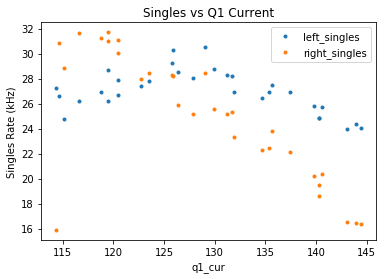

In [2]:
x, y, y2 = 'q1_cur', 'left_singles', 'right_singles'
cut1 = cut + ' and moller_output.run>17000 and inj_bcm_halla<0.4'
query = "select {}, {}/1000.0, {}/1000.0".format(x,y,y2) + cut1
plot_from_DB2(query, "Singles vs Q1 Current",x, "Singles Rate (kHz)",y,y2)

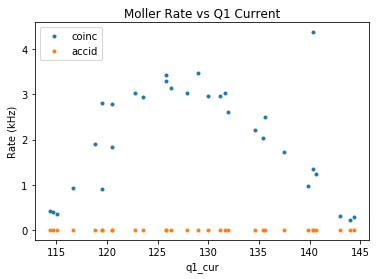

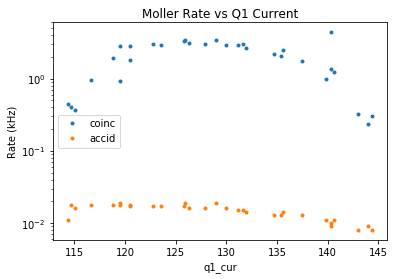

In [3]:
x, y, y2 = 'q1_cur', 'coinc', 'accid'
cut1 = cut + ' and moller_output.run>17000 and inj_bcm_halla<0.4 '
query = "select {}, {}/1000.0, {}/1000.0".format(x,y,y2) + cut1
plot_from_DB2(query, "Moller Rate vs Q1 Current",x, "Rate (kHz)",y,y2,0)
plot_from_DB2(query, "Moller Rate vs Q1 Current",x, "Rate (kHz)",y,y2,1)

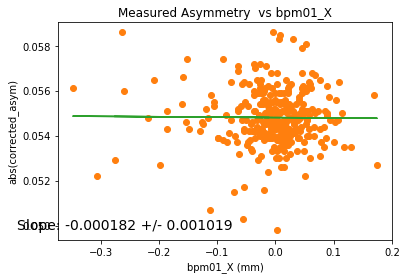

In [4]:
x, y = "bpm01_X", "abs(corrected_asym)"
cut1 = cut + ' and q1_cur>118 and q1_cur<140 '
query = "select {}, {}".format(x,y) + cut1
plot_from_DB(query, "Measured Asymmetry  vs {}".format(x), "{} (mm)".format(x),"{}".format(y),1)


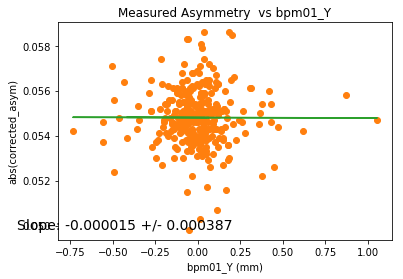

In [5]:
x, y = "bpm01_Y", "abs(corrected_asym)"
cut1 = cut + ' and q1_cur>118 and q1_cur<140 '
query = "select {}, {}".format(x,y) + cut1

plot_from_DB(query, "Measured Asymmetry  vs {}".format(x), "{} (mm)".format(x),"{}".format(y),1)

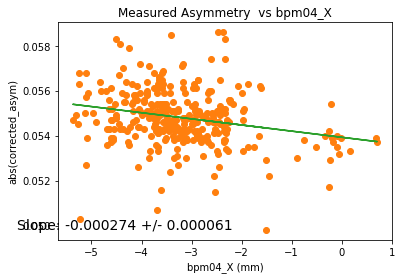

In [6]:
x, y = "bpm04_X", "abs(corrected_asym)"
cut1 = cut + ' and q1_cur>118 and q1_cur<140 '
query = "select {}, {}".format(x,y) + cut1

plot_from_DB(query, "Measured Asymmetry  vs {}".format(x), "{} (mm)".format(x),"{}".format(y), 1)

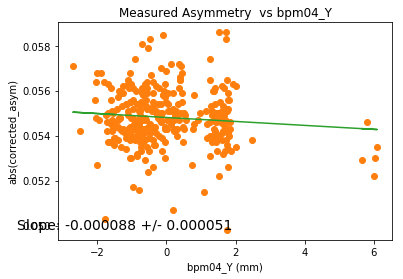

In [7]:
x, y = "bpm04_Y", "abs(corrected_asym)"
cut1 = cut + ' and q1_cur>118 and q1_cur<140 '
query = "select {}, {}".format(x,y) + cut1

plot_from_DB(query, "Measured Asymmetry  vs {}".format(x), "{} (mm)".format(x),"{}".format(y),1)

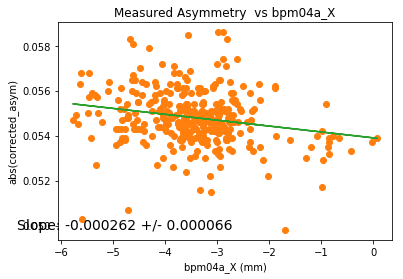

In [8]:
x, y = "bpm04a_X", "abs(corrected_asym)"
cut1 = cut + ' and q1_cur>118 and q1_cur<140 '
query = "select {}, {}".format(x,y) + cut1

plot_from_DB(query, "Measured Asymmetry  vs {}".format(x), "{} (mm)".format(x),"{}".format(y),1)

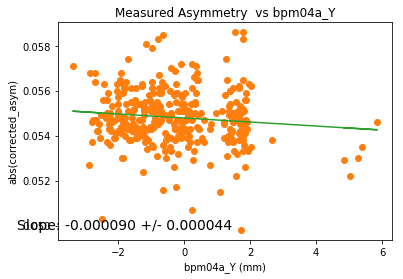

In [9]:
x, y = "bpm04a_Y", "abs(corrected_asym)"
cut1 = cut + ' and q1_cur>118 and q1_cur<140 '
query = "select {}, {}".format(x,y) + cut1

plot_from_DB(query, "Measured Asymmetry  vs {}".format(x), "{} (mm)".format(x),"{}".format(y),1)

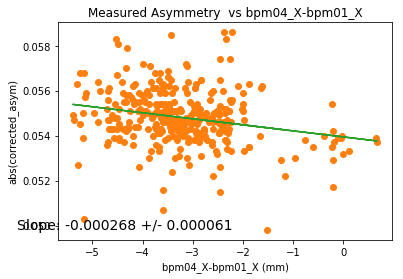

In [10]:
x, y = "bpm04_X-bpm01_X", "abs(corrected_asym)"
cut1 = cut + ' and q1_cur>118 and q1_cur<140 '
query = "select {}, {}".format(x,y) + cut1

plot_from_DB(query, "Measured Asymmetry  vs {}".format(x), "{} (mm)".format(x),"{}".format(y),1)

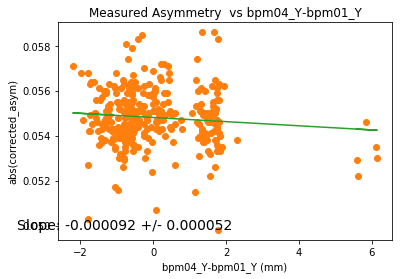

In [11]:
x, y = "bpm04_Y-bpm01_Y", "abs(corrected_asym)"
cut1 = cut + ' and q1_cur>118 and q1_cur<140 '
query = "select {}, {}".format(x,y) + cut1

plot_from_DB(query, "Measured Asymmetry  vs {}".format(x), "{} (mm)".format(x),"{}".format(y),1)

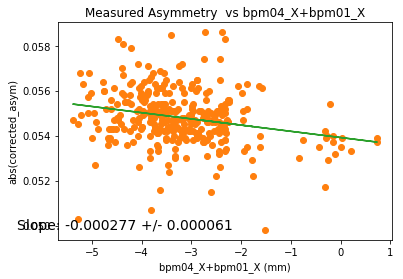

In [12]:
x, y = "bpm04_X+bpm01_X", "abs(corrected_asym)"
cut1 = cut + ' and q1_cur>118 and q1_cur<140 '
query = "select {}, {}".format(x,y) + cut1

plot_from_DB(query, "Measured Asymmetry  vs {}".format(x), "{} (mm)".format(x),"{}".format(y),1)

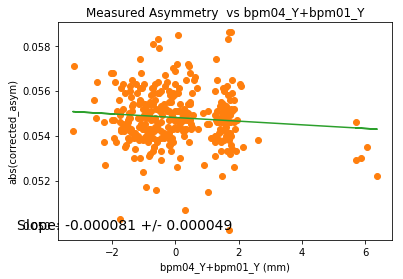

In [13]:
x, y = "bpm04_Y+bpm01_Y", "abs(corrected_asym)"
cut1 = cut + ' and q1_cur>118 and q1_cur<140 '
query = "select {}, {}".format(x,y) + cut1

plot_from_DB(query, "Measured Asymmetry  vs {}".format(x), "{} (mm)".format(x),"{}".format(y),1)

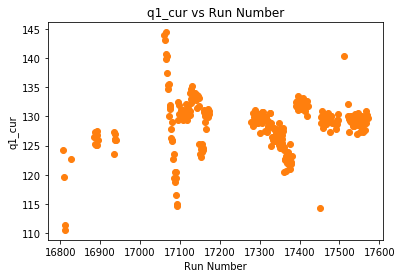

In [14]:
var = "q1_cur"
query = ('select moller_output.run, {} from moller_output, moller_settings, moller_quality ' 
         'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
         'and target==3 and inj_bcm_halla>0.1 and run_length>60 and (task=\'pol\' or task=\'qsc\')'
         'and quality=\'good\' and corrected_asym != 0').format(var)
plot_from_DB(query, "{} vs Run Number".format(var),"Run Number", "{}".format(var) )

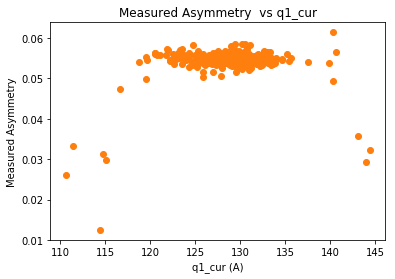

In [15]:
var = "q1_cur"
query = ('select {}, abs(corrected_asym) from moller_output, moller_settings, moller_quality ' 
         'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
         'and target==3 and inj_bcm_halla>0.1 and run_length>60 and (task=\'pol\' or task=\'qsc\')'
         'and quality=\'good\' and corrected_asym != 0').format(var)
plot_from_DB(query, "Measured Asymmetry  vs {}".format(var), "{} (A)".format(var),"Measured Asymmetry" )

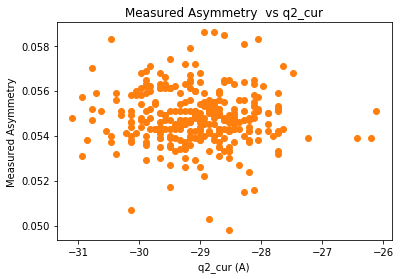

In [16]:
var = "q2_cur"
query = ('select {}, abs(corrected_asym) from moller_output, moller_settings, moller_quality ' 
         'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
         'and target==3 and inj_bcm_halla>0.1 and run_length>60 and (task=\'pol\' or task=\'qsc\')'
         'and quality=\'good\' and q1_cur>118 and q1_cur<140 and corrected_asym != 0').format(var)
plot_from_DB(query, "Measured Asymmetry  vs {}".format(var), "{} (A)".format(var),"Measured Asymmetry" )

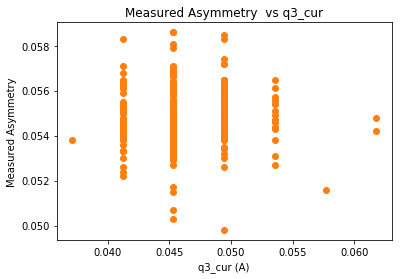

In [17]:
var = "q3_cur"
query = ('select {}, abs(corrected_asym) from moller_output, moller_settings, moller_quality ' 
         'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
         'and target==3 and inj_bcm_halla>0.1 and run_length>60 and (task=\'pol\' or task=\'qsc\')'
         'and quality=\'good\' and q1_cur>118 and q1_cur<140 and corrected_asym != 0').format(var)
plot_from_DB(query, "Measured Asymmetry  vs {}".format(var), "{} (A)".format(var),"Measured Asymmetry" )

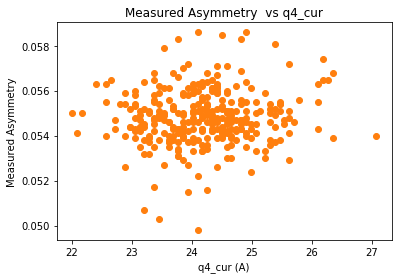

In [18]:
var = "q4_cur"
query = ('select {}, abs(corrected_asym) from moller_output, moller_settings, moller_quality ' 
         'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
         'and target==3 and inj_bcm_halla>0.1 and run_length>60 and (task=\'pol\' or task=\'qsc\')'
         'and quality=\'good\' and q1_cur>118 and q1_cur<140 and corrected_asym != 0').format(var)
plot_from_DB(query, "Measured Asymmetry  vs {}".format(var), "{} (A)".format(var),"Measured Asymmetry" )

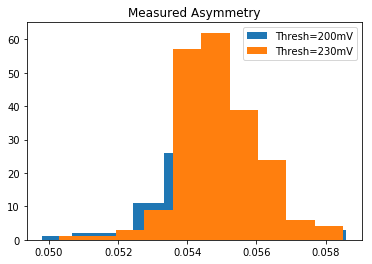

In [19]:
var = "trig_thresh_ch0"
query = ('select {}, abs(corrected_asym) from moller_output, moller_settings, moller_quality ' 
         'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
         'and target==3 and inj_bcm_halla>0.1 and run_length>60 and (task=\'pol\' or task=\'qsc\')'
         'and quality=\'good\' and q1_cur>118 and q1_cur<140 and corrected_asym != 0').format(var)
x1 = []
x2 = []
for row in c.execute(query):
    if row[0] == 200:
         x1.append(row[1])
    if row[0] == 230:
        x2.append(row[1])
plt.hist(x1,label='Thresh=200mV')
plt.hist(x2,label='Thresh=230mV')
plt.title("Measured Asymmetry")
plt.legend()
plt.show()

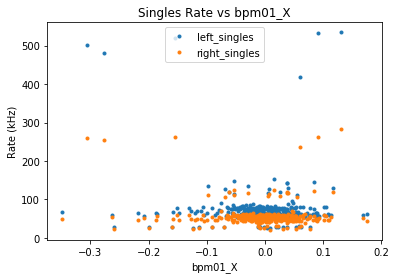

In [20]:
x, y, y2 = 'bpm01_X', 'left_singles', 'right_singles'
cut1 = cut + ' and q1_cur > 117 and q1_cur<140 '
query = "select {}, {}/1000.0, {}/1000.0".format(x,y,y2) + cut1
plot_from_DB2(query, "Singles Rate vs {}".format(x),x, "Rate (kHz)",y,y2,0)

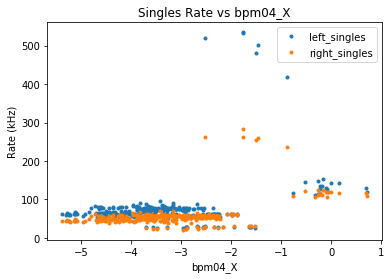

In [21]:
x, y, y2 = 'bpm04_X', 'left_singles', 'right_singles'
cut1 = cut + ' and q1_cur > 117 and q1_cur<140'
query = "select {}, {}/1000.0, {}/1000.0".format(x,y,y2) + cut1
plot_from_DB2(query, "Singles Rate vs {}".format(x),x, "Rate (kHz)",y,y2,0)

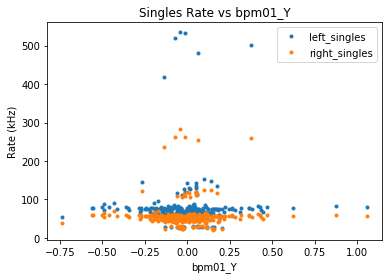

In [22]:
x, y, y2 = 'bpm01_Y', 'left_singles', 'right_singles'
cut1 = cut + ' and q1_cur > 117 and q1_cur<140 '
query = "select {}, {}/1000.0, {}/1000.0".format(x,y,y2) + cut1
plot_from_DB2(query, "Singles Rate vs {}".format(x),x, "Rate (kHz)",y,y2,0)

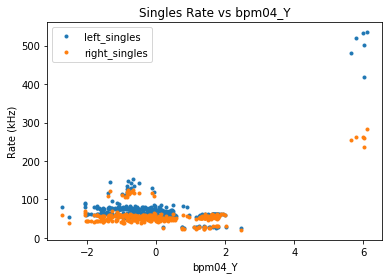

In [23]:
x, y, y2 = 'bpm04_Y', 'left_singles', 'right_singles'
cut1 = cut + ' and q1_cur > 117 and q1_cur<140 '
query = "select {}, {}/1000.0, {}/1000.0".format(x,y,y2) + cut1
plot_from_DB2(query, "Singles Rate vs {}".format(x),x, "Rate (kHz)",y,y2,0)

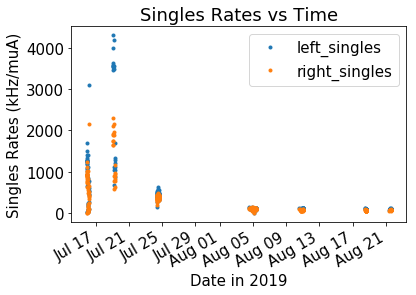

In [24]:
t, y,y2 = 'run_end', 'left_singles', 'right_singles'
cut1 = (' from moller_output, moller_settings, moller_quality ' 
       'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
       'and target==3 and inj_bcm_halla>0.1 and run_length>60 ')
query = "select {}, {}/1000.0/inj_bcm_halla, {}/1000.0/inj_bcm_halla ".format(t,y,y2) + cut1
plt.rcParams.update({'font.size': 15})
plot_time_series2(query,"Singles Rates vs Time",'Singles Rates (kHz/muA)','{}'.format(y),'{}'.format(y2))

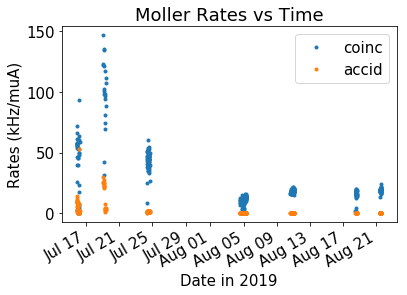

In [25]:
t, y, y2 = 'run_start', 'coinc', 'accid'
cut1 = (' from moller_output, moller_settings, moller_quality ' 
       'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
       'and target==3 and inj_bcm_halla>0.1 and run_length>60 ')
query = "select {}, {}/1000.0/inj_bcm_halla, {}/1000.0/inj_bcm_halla ".format(t,y,y2) + cut1
plt.rcParams.update({'font.size': 15})
plot_time_series2(query,"Moller Rates vs Time",'Rates (kHz/muA)','{}'.format(y),'{}'.format(y2))

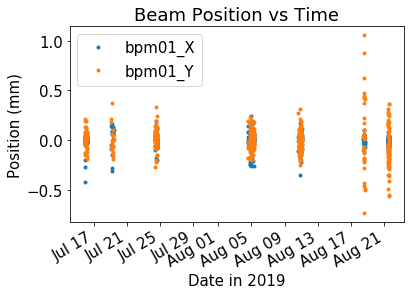

In [26]:
t, y, y2 = 'run_start', 'bpm01_X', 'bpm01_Y'
cut1 = (' from moller_output, moller_settings, moller_quality ' 
       'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
       'and target==3 and inj_bcm_halla>0.1 and run_length>60 ')
query = "select {}, {}, {} ".format(t,y,y2) + cut1
plt.rcParams.update({'font.size': 15})
plot_time_series2(query,"Beam Position vs Time",'Position (mm)','{}'.format(y),'{}'.format(y2))

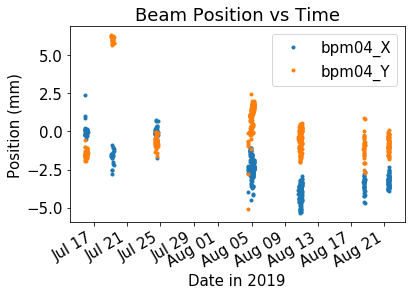

In [27]:
t, y, y2 = 'run_start', 'bpm04_X', 'bpm04_Y'
cut1 = (' from moller_output, moller_settings, moller_quality ' 
       'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
       'and target==3 and inj_bcm_halla>0.1 and run_length>60 ')
query = "select {}, {}, {} ".format(t,y,y2) + cut1
plt.rcParams.update({'font.size': 15})
plot_time_series2(query,"Beam Position vs Time",'Position (mm)','{}'.format(y),'{}'.format(y2))

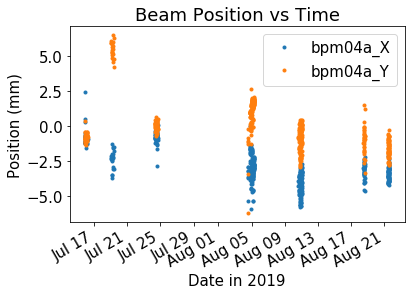

In [28]:
t, y, y2 = 'run_start', 'bpm04a_X', 'bpm04a_Y'
cut1 = (' from moller_output, moller_settings, moller_quality ' 
       'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
       'and target==3 and inj_bcm_halla>0.1 and run_length>60 ')
query = "select {}, {}, {} ".format(t,y,y2) + cut1
plt.rcParams.update({'font.size': 15})
plot_time_series2(query,"Beam Position vs Time",'Position (mm)','{}'.format(y),'{}'.format(y2))

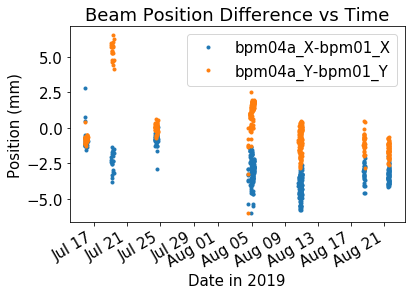

In [29]:
t, y, y2 = 'run_start', 'bpm04a_X-bpm01_X', 'bpm04a_Y-bpm01_Y'
cut1 = (' from moller_output, moller_settings, moller_quality ' 
       'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
       'and target==3 and inj_bcm_halla>0.1 and run_length>60 ')
query = "select {}, {}, {} ".format(t,y,y2) + cut1
plt.rcParams.update({'font.size': 15})
plot_time_series2(query,"Beam Position Difference vs Time",'Position (mm)','{}'.format(y),'{}'.format(y2))

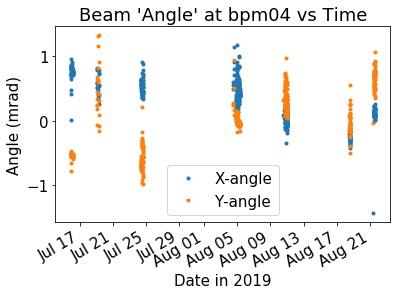

In [30]:
t, y, y2 = 'run_start', '(bpm04_X-bpm04a_X)/1.19', '(bpm04_Y-bpm04a_Y)/1.19'
cut1 = (' from moller_output, moller_settings, moller_quality ' 
       'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
       'and target==3 and inj_bcm_halla>0.1 and run_length>60 ')
query = "select {}, {}, {} ".format(t,y,y2) + cut1
plt.rcParams.update({'font.size': 15})
plot_time_series2(query,"Beam \'Angle' at bpm04 vs Time",'Angle (mrad)','X-angle','Y-angle')

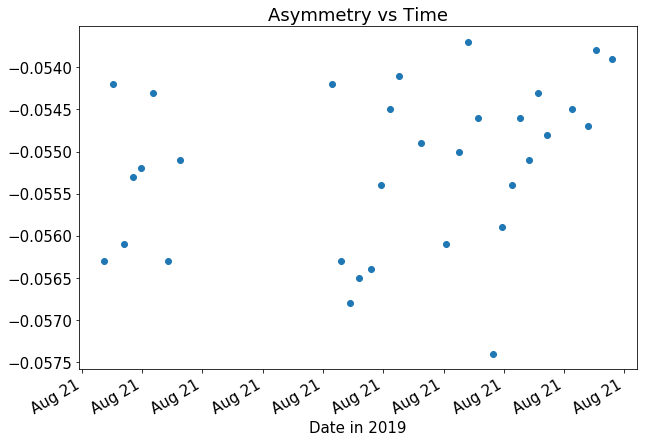

In [49]:
t, y = 'run_start', 'corrected_asym'
cut1 = cut + ' and ihwp=\'OUT\' and moller_settings.run>17520 and task=\'pol\''
query = "select {}, {} ".format(t,y) + cut1
plt.rcParams.update({'font.size': 15})
plot_time_series(query,"Asymmetry vs Time")

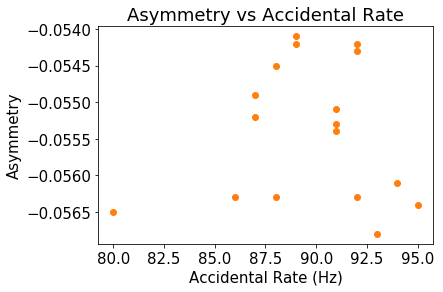

In [38]:
cut1 = (' from moller_output, moller_settings, moller_quality ' 
       'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
       'and target==3 and inj_bcm_halla>0.1 and run_length>60 and task=\'pol\' and quality=\'good\''
       ' and corrected_asym != 0 and moller_output.run>17520 and ihwp = \'OUT\'')
x, y = 'accid', 'corrected_asym'
query = "select {}, {} ".format(x,y) + cut1
plt.rcParams.update({'font.size': 15})
plot_from_DB(query, "Asymmetry vs Accidental Rate".format(x),"Accidental Rate (Hz)", "Asymmetry", y)

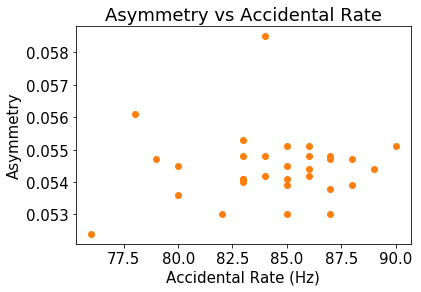

In [39]:
cut1 = (' from moller_output, moller_settings, moller_quality ' 
       'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
       'and target==3 and inj_bcm_halla>0.1 and run_length>60 and task=\'pol\' and quality=\'good\''
       ' and corrected_asym != 0 and moller_output.run>17520 and ihwp = \'IN\'')
x, y = 'accid', 'corrected_asym'
query = "select {}, {} ".format(x,y) + cut1
plt.rcParams.update({'font.size': 15})
plot_from_DB(query, "Asymmetry vs Accidental Rate".format(x),"Accidental Rate (Hz)", "Asymmetry", y)

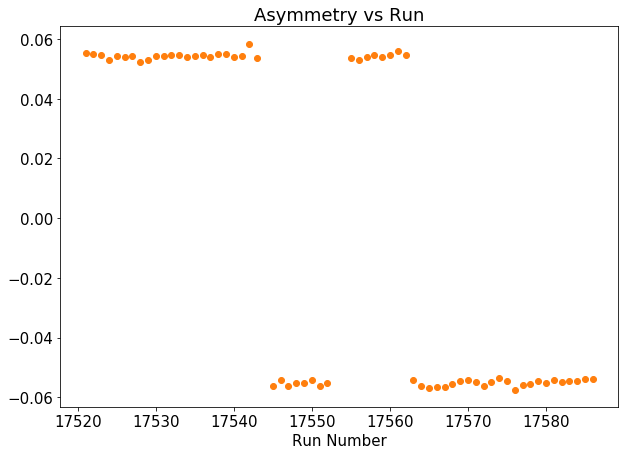

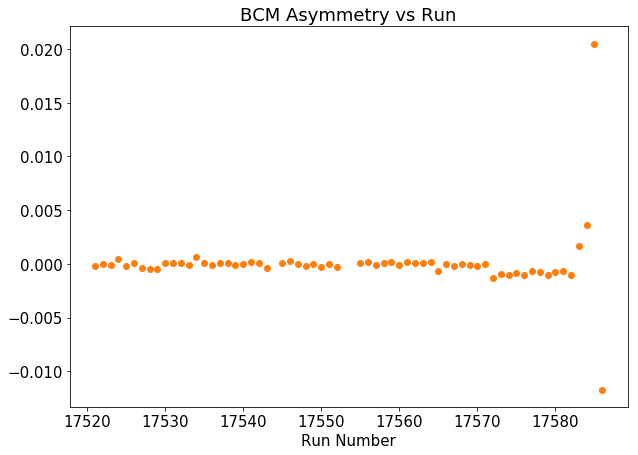

In [64]:
cut1 = (' from moller_output, moller_settings, moller_quality ' 
       'where moller_output.run=moller_settings.run and moller_output.run=moller_quality.run '
       'and target==3 and inj_bcm_halla>0.1 and run_length>60 and task=\'pol\' '
       ' and corrected_asym != 0 and moller_output.run>17520' )
x,y = 'run', 'corrected_asym'
query = "select moller_output.{}, {} ".format(x,y) + cut1
plt.rcParams.update({'font.size': 15})
plot_from_DB(query, "Asymmetry vs Run","Run Number")
x,y = 'run', 'bcm_asym'
query = "select moller_output.{}, {} ".format(x,y) + cut1
plt.rcParams.update({'font.size': 15})
plot_from_DB(query, "BCM Asymmetry vs Run","Run Number")